In [2]:
# read data
import pandas as pd
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
# Drop the unused variables
df=df.drop(['Name'], axis=1)

In [52]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# Dependent Variable Distribution

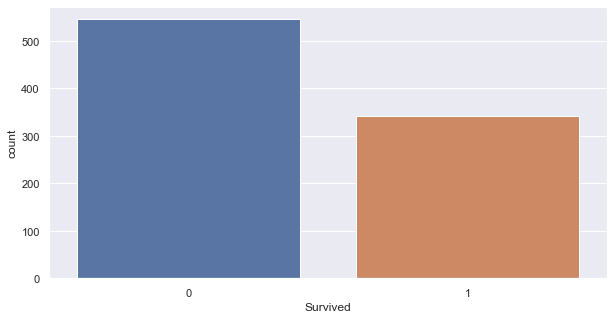

In [47]:
# Dependent Variables Distribution
import seaborn as sns
sns.countplot(df['Survived'])

# Correlation Analysis

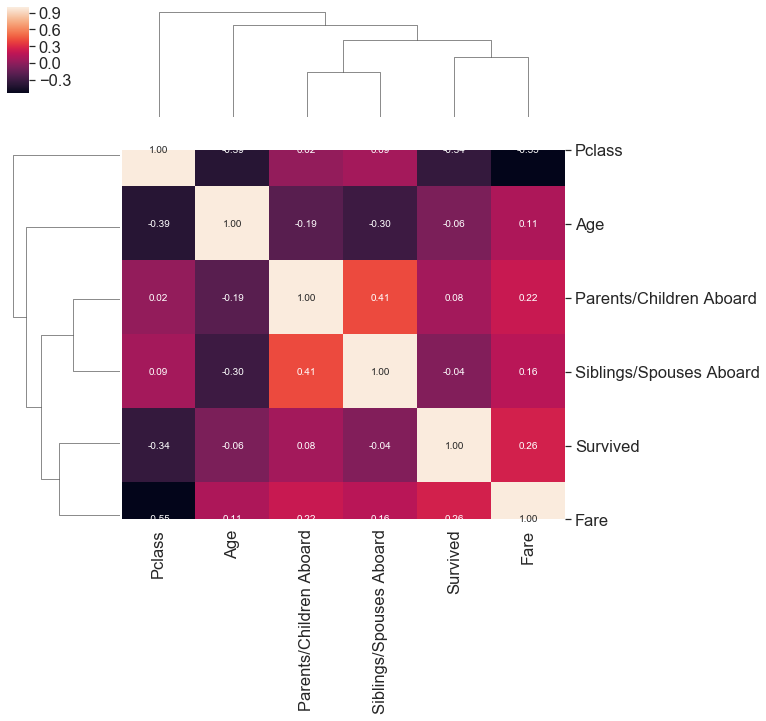

<Figure size 2160x2160 with 0 Axes>

In [50]:
import numpy as np
k = len(df.columns)
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.clustermap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.figure(figsize=(30,30))
plt.setp(hm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [43]:
# Only parents/Children aboard and Siblings/Spouses aboard have some correlation

# Bivariate Analysis

In [64]:
df_dummy=pd.get_dummies(df['Sex'])

In [69]:
df_dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [66]:
df['female']=df_dummy.female

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


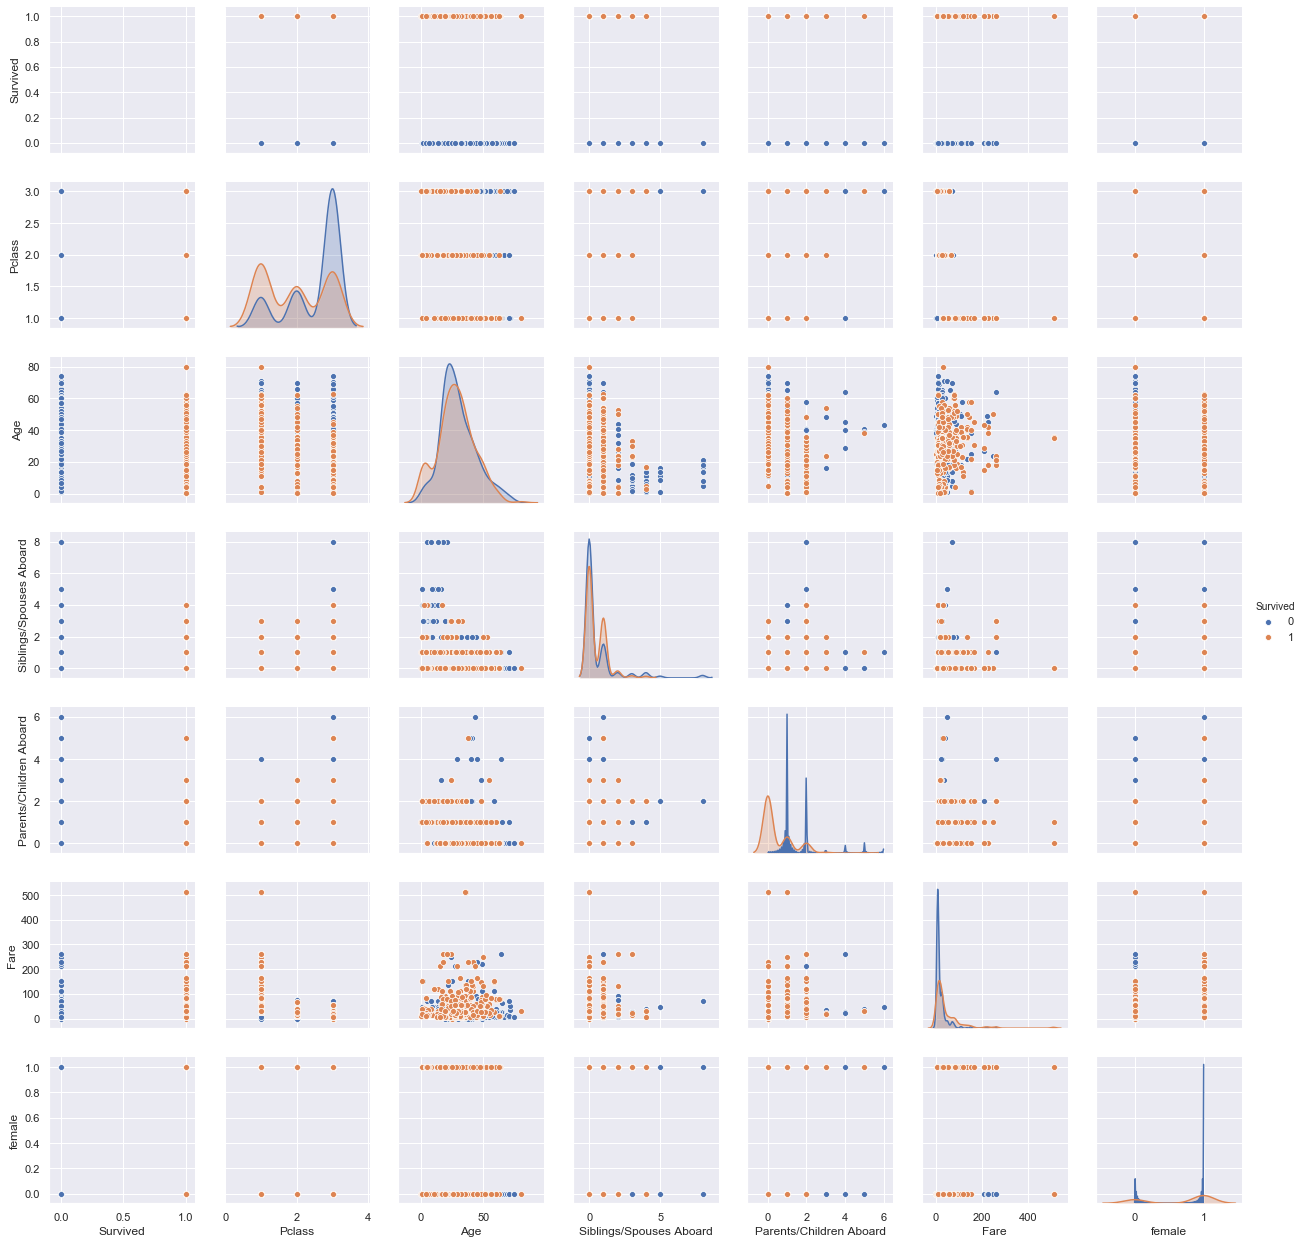

In [68]:
# Bivariate analysis
column_list=list(df.columns)
sns.set()
sns.pairplot(df[column_list], size = 2.5, hue="Survived")
plt.show()

In [55]:
# From the bivariation analysis: we could have some rough intuition
# 1. Yonger age in lower Pclass number more likely survie
# 2. Pcalss=3 has highest % of unsurive
# 3. No parents/children aboard more likely to survive
# 4. Higher fare has higher % of survive
# 5. With siblings/spouses aboard has higher chance to survive
# 6. Older pople with lower fare more likely to unsurvive

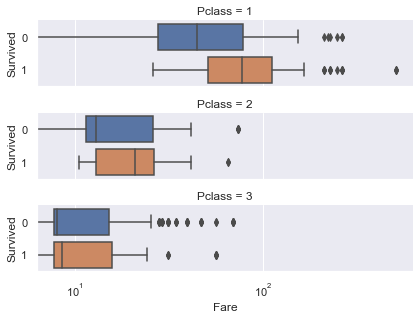

In [78]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

In [80]:
# For the 1st & 2nd class, the higher fare, higher survive. 
# 3rd class fare does not have much correlation with survive
# Between different classes, the lower Pclass number, the higher survive

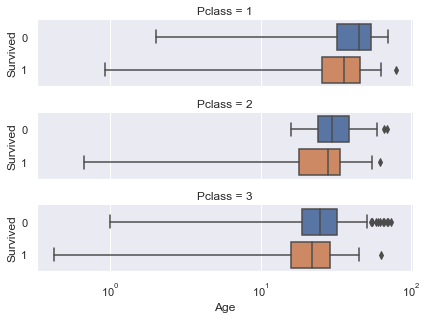

In [81]:
g = sns.catplot(x="Age", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

In [83]:
# for all classes, younger age has higher survive

# Missing Data

In [56]:
# Check top missing data columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Fare,0,0.0
Parents/Children Aboard,0,0.0
Siblings/Spouses Aboard,0,0.0
Age,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [57]:
# No missing data

# Univariate Analysis

### Age

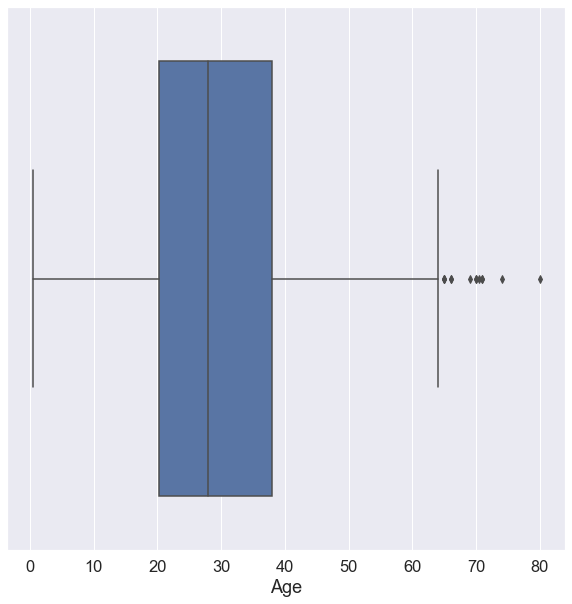

In [36]:
sns.boxplot(df['Age'])

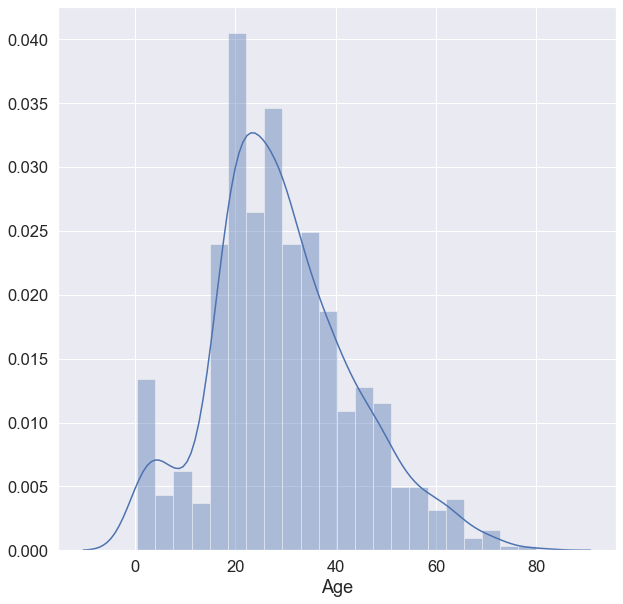

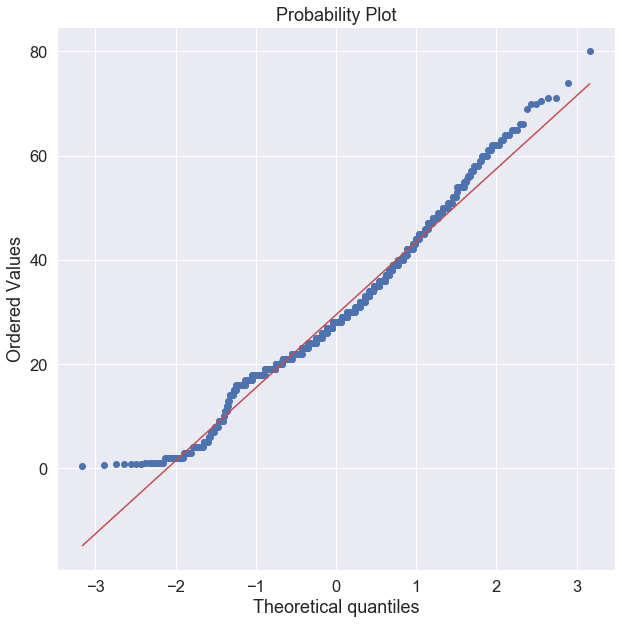

In [38]:
from scipy import stats
sns.distplot(df['Age'])
fig = plt.figure()
res = stats.probplot(df['Age'], plot=plt)

In [58]:
# Age generally fit normal distribution

### Fare

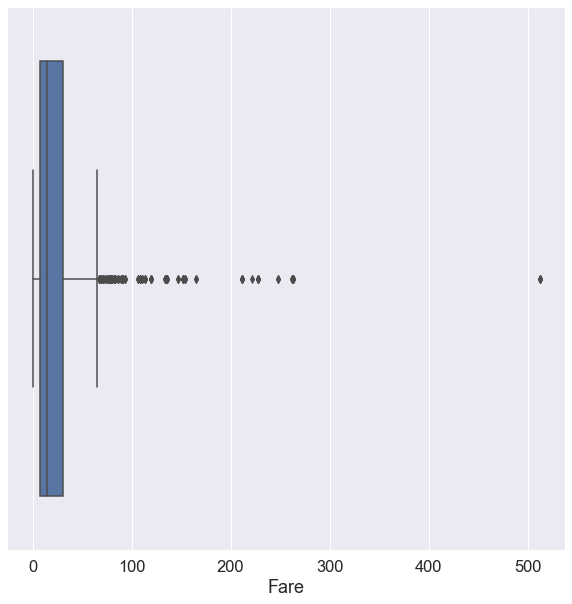

In [39]:
sns.boxplot(df['Fare'])

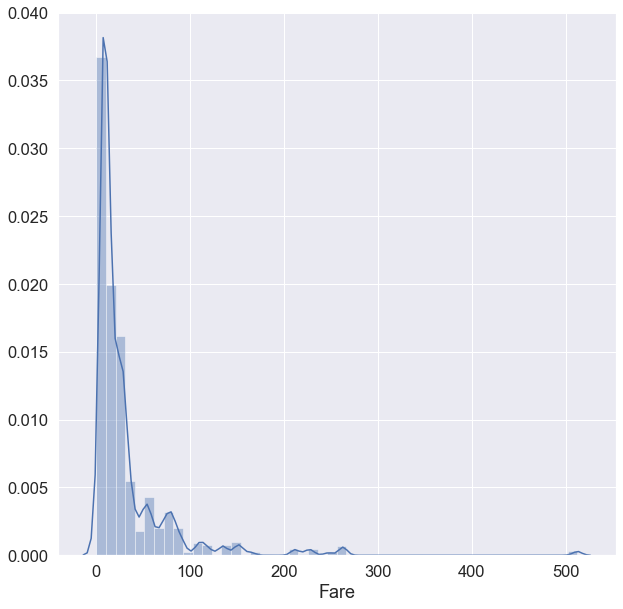

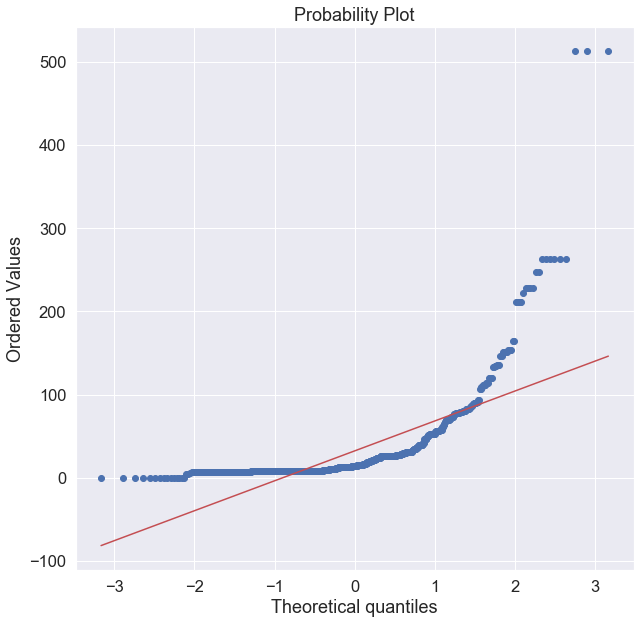

In [40]:
sns.distplot(df['Fare'])
fig = plt.figure()
res = stats.probplot(df['Fare'], plot=plt)

In [59]:
# Fare is schewed

### Sex

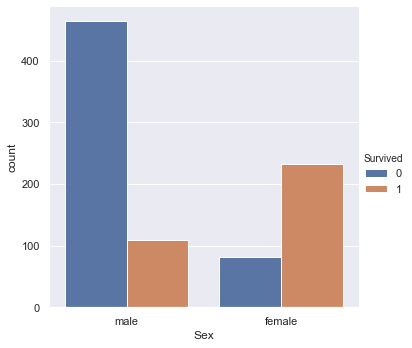

In [73]:
sns.catplot(x="Sex", kind="count", hue='Survived', data=df)